<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [118]:
# Read CSV
wine_csv = '../../data/winequality_merged.csv'

In [119]:
data = pd.read_csv(wine_csv)

#### 1.2 Explore Data (Exploratory Data Analysis)

In [120]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [121]:
data.columns = data.columns.str.replace(' ', '_')

In [122]:
# ANSWER
data.shape

(6497, 13)

In [123]:
data.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red_wine                0
dtype: int64

In [124]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
red_wine                  int64
dtype: object

### 2. Set Target Variable

In [125]:
# drop some rows to do k fold
data = data[0:6495]
data.shape

(6495, 13)

Create a target variable for wine quality.

In [126]:
# Target Variable
y = data['quality']
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

<AxesSubplot:>

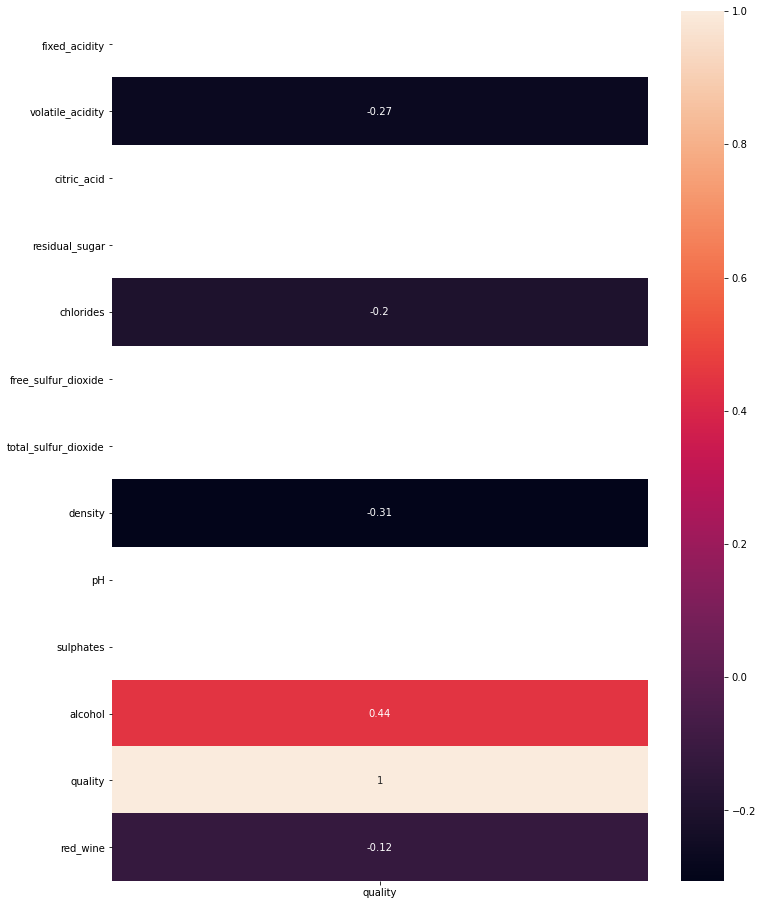

In [127]:
# ANSWER
plt.figure(figsize=(12,16))
sns.heatmap(data.corr()[['quality']], annot=True, mask = (abs(data.corr()[['quality']]) < 0.1 ))

In [128]:
X = data[['volatile_acidity', 'chlorides', 'density', 'alcohol', 'red_wine']]

### 4. Using Linear Regression Create a Model and Test Score

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [130]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [131]:
# Create a model for Linear Regression
lr = LinearRegression()

# Fit the model with the Training data
lr.fit(X,y)

# Calculate the score (R^2 for Regression) for Training Data
train_r_sq_score = lr.score(X_train, y_train)
print(f"Train R^2 score = {train_r_sq_score}")
# Calculate the score (R^2 for Regression) for Testing Data
test_r_sq_score = lr.score(X_test, y_test)
print(f"Test R^2 score = {test_r_sq_score}")

Train R^2 score = 0.27633994858798494
Test R^2 score = 0.2409250036384628


### BONUS: Cross validation

In [132]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [185]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    print(f"K: {k}")
    print("TRAIN:", train, "\nTEST:", test)
    
    assert len(test)/len(train) == 1/4
    
    # Get training and test sets for X and y
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
    # Fit model with training set
    lr.fit(X_train, y_train)

    # Make predictions with training and test set
    predicted_price_train = lr.predict(X_train)
    predicted_price = lr.predict(X_test)
    
    y_test = y_test.to_numpy().reshape(-1,1)
    predicted_price = predicted_price.reshape(-1,1)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(lr.score(X_train, y_train))
    train_rmse.append(mean_squared_error(y_train, predicted_price_train))
    
    test_scores.append(lr.score(X_test, y_test))
    test_rmse.append(mean_squared_error(y_test, predicted_price))
    
# Create a metrics_df dataframe to display r2 and rmse scores
print(len(test_rmse))
metrics_df = pd.DataFrame({'train_scores': train_scores, 'test_scores': test_scores, 'train_rmse': train_rmse,  'test_rmse': test_rmse}, index = ['1', '2', '3', '4', '5'])
metrics_df

K: 0
TRAIN: [   0    1    2 ... 6491 6492 6493] 
TEST: [   5    6   11 ... 6477 6480 6494]
K: 1
TRAIN: [   0    1    2 ... 6489 6491 6494] 
TEST: [   3    7   15 ... 6490 6492 6493]
K: 2
TRAIN: [   1    2    3 ... 6492 6493 6494] 
TEST: [   0    4    8 ... 6483 6485 6486]
K: 3
TRAIN: [   0    1    2 ... 6492 6493 6494] 
TEST: [  10   18   22 ... 6482 6487 6489]
K: 4
TRAIN: [   0    3    4 ... 6492 6493 6494] 
TEST: [   1    2   13 ... 6476 6484 6491]
5


,train_scores,test_scores,train_rmse,test_rmse
1,0.267151,0.277019,0.547305,0.595175
2,0.281771,0.219094,0.551126,0.579854
3,0.263943,0.292438,0.559905,0.544566
4,0.271777,0.261016,0.560477,0.541899
5,0.264981,0.289631,0.564297,0.526692


In [186]:
# Describe the metrics
metrics_df.describe()

,train_scores,test_scores,train_rmse,test_rmse
count,5.000000,5.000000,5.000000,5.000000
mean,0.269925,0.267840,0.556622,0.557637
std,0.007275,0.029946,0.007099,0.028630
min,0.263943,0.219094,0.547305,0.526692
25%,0.264981,0.261016,0.551126,0.541899
50%,0.267151,0.277019,0.559905,0.544566
75%,0.271777,0.289631,0.560477,0.579854
max,0.281771,0.292438,0.564297,0.595175


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



